#### Install Required Libraries


In [ ]:
# !pip install gseapy==1.0.6
!pip install mofapy2
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
# !pip install --no-cache-dir gseapy

# # !pip install kmeans
# # !pip install silhouette_score
# # !pip install umap-learn
# !pip install mofapy2


# # !pip install gseapy
# # !pip install gseapy bioservices pandas
# # !pip install gprofiler-official
# # !pip install mummichog pandas numpy

# # !pip install git+https://github.com/shuzhao-li/mummichog.git
# !pip install gseapy==1.0.6


### ===========Import Libraries============

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.mixture import GaussianMixture

import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
# from tensorflow.keras import layers, models
# from tensorflow.keras.losses import BinaryCrossentropy
# from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import torch
# from mummichog import PathwayAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# from tensorflow import keras
# from tensorflow.keras import layers
le = LabelEncoder()
from sklearn.decomposition import PCA
# from mofapy2.run.entry_point import entry_point
# import gseapy as gp
# from bioservices import KEGG
from sklearn.preprocessing import StandardScaler
import shap
# from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
# import keras_tuner as kt
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances

In [2]:
# load Dataset and Inspect
df = pd.read_csv("/content/drive/MyDrive/MY THESIS/Thesis/multi_omics_Data.csv")

In [3]:
# INspect Dataset
df.head()


,i,indentity,AMP,Pyruvate,Acetyl-CoA,Glutamate,2OG,Oxaloacetate,Glycine,Succinate,...,M_162,M_163,M_164,M_165,M_166,M_167,M_168,M_169,M_170,M_171
0,0.0,AU565_AAACCAGTTTGG,-0.010239,0.000631,-0.000042,-0.005516,0.008809,0.013755,-0.012962,0.009903,...,0.018209,2.710149e-07,0.003712,0.006100,0.019097,0.006360,0.000233,0.000004,0.012460,0.000164
1,1.0,AU565_AAACGTGCAGCG,-0.012007,0.003525,-0.024046,0.002816,0.047261,0.007665,-0.024386,0.037714,...,0.018629,4.339963e-07,0.003619,0.002290,0.025268,0.013540,0.000482,0.002558,0.012460,0.000163
2,2.0,AU565_AAAGCCACATGC,-0.003727,0.012940,0.002271,0.001271,0.009750,0.004987,-0.013087,0.029924,...,0.017078,2.710149e-07,0.003786,0.003164,0.012625,0.011122,0.000040,0.092450,0.013023,0.000163
3,3.0,AU565_AAAGTCGGCTGG,-0.008337,0.003148,0.003621,-0.002131,0.012203,0.016008,-0.013417,0.025335,...,0.016643,4.339963e-07,0.003729,0.005720,0.008954,0.010175,0.000057,0.001893,0.012460,0.000163
4,4.0,AU565_AAAGTGCCTAAA,-0.008580,-0.022309,-0.005764,0.011526,0.013700,0.006834,-0.013482,0.054048,...,0.020276,2.710149e-07,0.003629,0.003326,0.019097,0.005717,0.000038,0.000009,0.013023,0.000164


In [4]:
df.describe()

,i,AMP,Pyruvate,Acetyl-CoA,Glutamate,2OG,Oxaloacetate,Glycine,Succinate,UDP-N-acetylglucosamine,...,M_162,M_163,M_164,M_165,M_166,M_167,M_168,M_169,M_170,M_171
count,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,...,35276.000000,3.527600e+04,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,3.527600e+04,35276.000000,35276.000000
mean,17637.500000,-0.012558,0.001924,0.007376,0.002085,0.010805,0.010293,-0.009640,0.016647,-0.005012,...,0.016134,1.007146e-04,0.002278,0.007658,0.008424,0.015493,0.003894,2.865211e-03,0.013115,0.000090
std,10183.448385,0.019367,0.017608,0.030329,0.013082,0.009008,0.015340,0.012947,0.017187,0.010663,...,0.009410,1.133715e-03,0.001785,0.010702,0.009779,0.016719,0.013359,1.573252e-02,0.010060,0.000868
min,0.000000,-0.353642,-0.269620,-0.233043,-0.182313,-0.164419,-0.112135,-0.271683,-0.208431,-0.237602,...,0.005209,2.910383e-11,-0.000017,-0.000696,-0.000005,-0.001142,-0.002290,-4.222229e-03,0.001875,0.000007
25%,8818.750000,-0.020635,-0.003273,-0.008208,-0.001670,0.006967,0.000605,-0.012468,0.008164,-0.005482,...,0.012002,2.570450e-07,0.001698,0.002045,0.004457,0.005354,0.000011,-5.916227e-07,0.007198,0.000050
50%,17637.500000,-0.007631,0.001413,0.004622,0.000041,0.008231,0.003455,-0.010564,0.015150,-0.002589,...,0.013206,5.681068e-07,0.002071,0.003767,0.005800,0.009011,0.000063,1.164153e-09,0.011521,0.000070
75%,26456.250000,-0.000684,0.005256,0.020500,0.002796,0.011320,0.014623,-0.007814,0.023830,-0.000424,...,0.016310,2.501532e-06,0.002549,0.008698,0.008352,0.018932,0.001450,3.400911e-05,0.016662,0.000088
max,35275.000000,0.180453,0.235788,0.319097,0.257383,0.234726,0.277436,0.195164,0.212287,0.176858,...,0.182249,9.049392e-02,0.090209,0.169220,0.243853,0.223058,0.388528,3.970387e-01,0.177821,0.095796


In [5]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Identify identity column (assuming it's named 'ID' or similar)
identity_column = ["ID", "i"]  # Update with the actual column name if different

# Drop non-numeric and identity columns
df_fluxomics = df.drop(columns=non_numeric_columns.union(identity_column), errors='ignore')

print("Columns dropped:", list(non_numeric_columns) + identity_column)
print("Remaining numeric columns:", df_fluxomics.columns)

Columns dropped: ['indentity', 'ID', 'i']
Remaining numeric columns: Index(['AMP', 'Pyruvate', 'Acetyl-CoA', 'Glutamate', '2OG', 'Oxaloacetate',
       'Glycine', 'Succinate', 'UDP-N-acetylglucosamine', 'lysine',
       ...
       'M_162', 'M_163', 'M_164', 'M_165', 'M_166', 'M_167', 'M_168', 'M_169',
       'M_170', 'M_171'],
      dtype='object', length=238)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35276 entries, 0 to 35275
Columns: 240 entries, i to M_171
dtypes: float64(239), object(1)
memory usage: 64.6+ MB


In [7]:
# Select metabolite columns (assuming they are in columns 1 to 70)
df_metabolites = df_fluxomics.iloc[:, 0:70]  # Python indexing is zero-based (1st col is index 0)

# Select gene expression columns (assuming they are in columns 71 to 238)
df_genes = df_fluxomics.iloc[:, 70:238]  # Adjust the range based on your dataset structure

In [8]:
# checking for Missing Number
df_metabolites.isnull().sum()

,0
AMP,0
Pyruvate,0
Acetyl-CoA,0
Glutamate,0
2OG,0
...,...
Pyrimidine,0
(Glc)3 (GlcNAc)2 (Man)9 (Asn)1,0
(GlcNAc)4 (Man)3 (Asn)1,0
(Gal)2 (GlcA)1 (Xyl)1 (Ser)1,0


### ========Histograms Plot for metabolites ===========

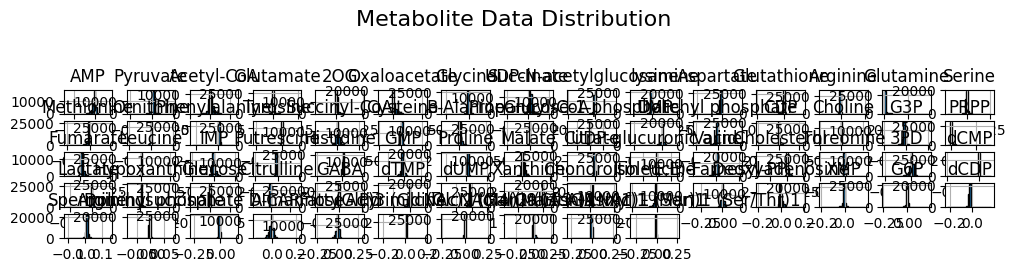

In [9]:
# Plot histograms for metabolites
df_metabolites.hist(figsize=(12, 8), bins=30, layout=(20, 15), edgecolor='black')
plt.suptitle('Metabolite Data Distribution', fontsize=16)
plt.show()


### ========Boxplot for metabolites ===========

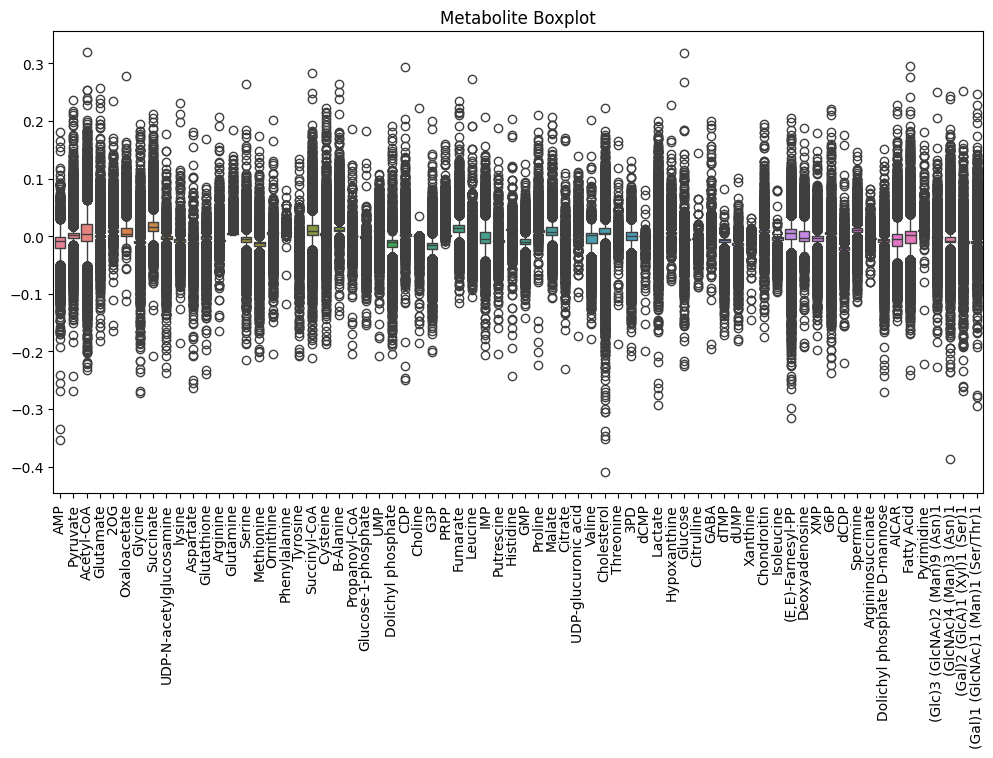

In [10]:
# Boxplot for metabolites
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_metabolites)
plt.xticks(rotation=90)
plt.title("Metabolite Boxplot")
plt.show()


========Correlation matrix ===========

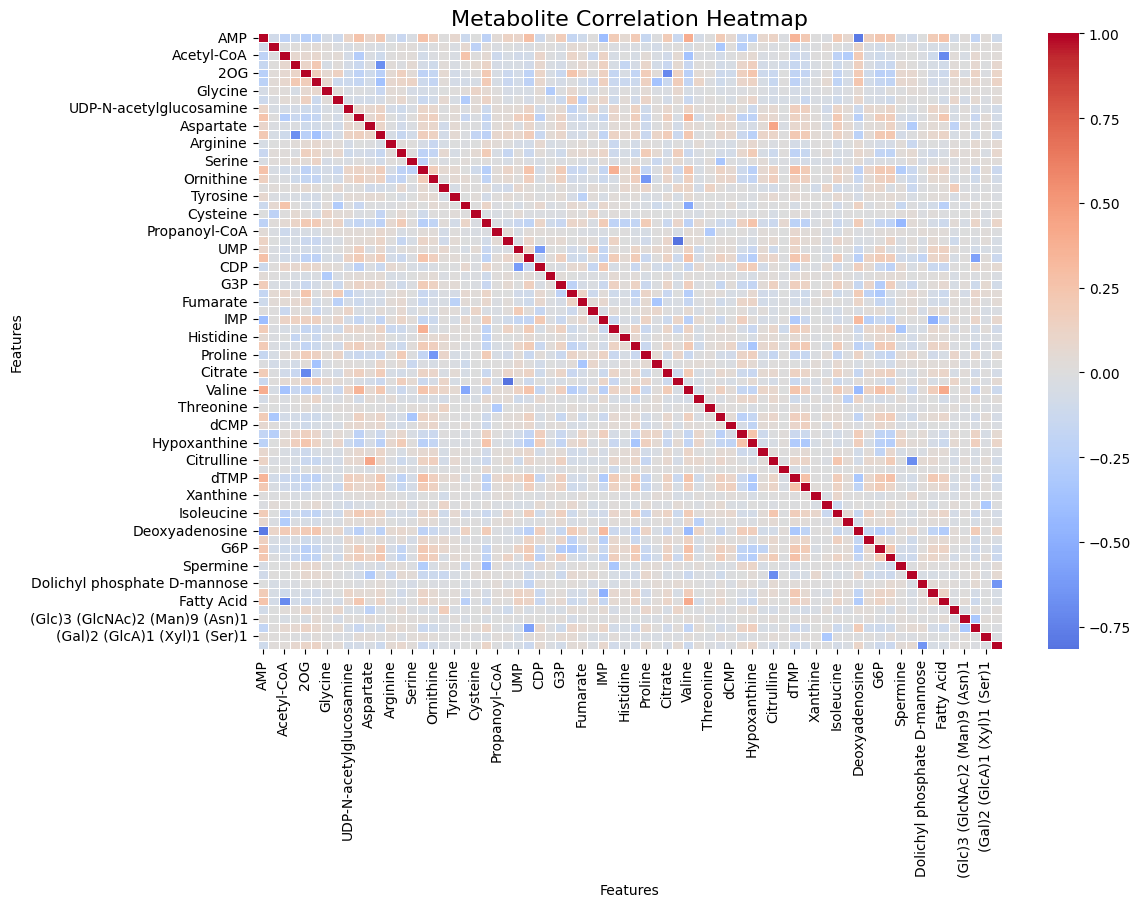

In [11]:

# Compute the correlation matrix between all metabolites and all genes
corr_matrix= df_metabolites.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5, center=0)
plt.title("Metabolite Correlation Heatmap", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

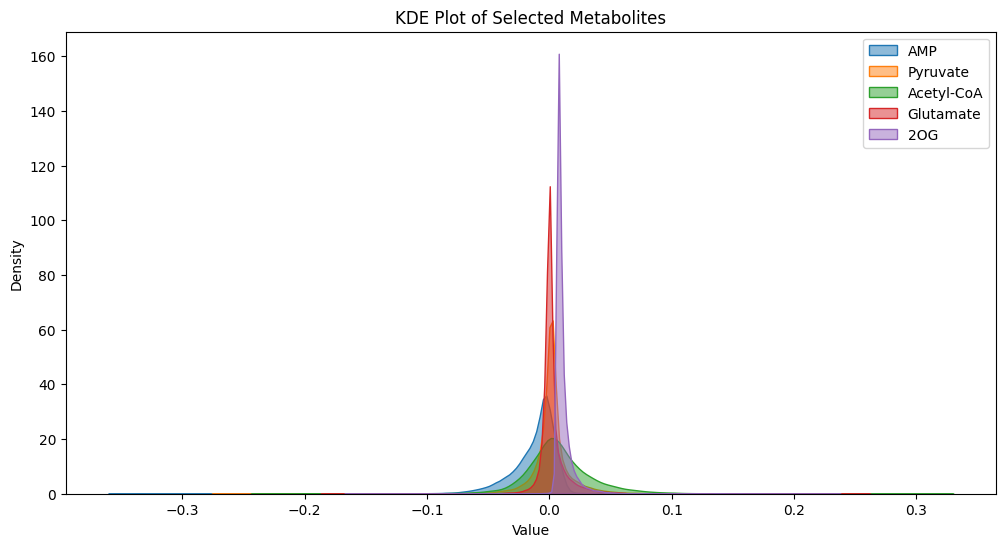

In [12]:
# Select a subset of columns for visualization
selected_columns = df_metabolites.columns[:5]  # Pick a few to avoid overcrowding

plt.figure(figsize=(12, 6))
for col in selected_columns:
    sns.kdeplot(df_metabolites[col], label=col, fill=True, alpha=0.5)

plt.legend()
plt.title("KDE Plot of Selected Metabolites")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-13-d7cbb275e2f6>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=umap_features_2d[:, 0], y=umap_features_2d[:, 1], palette='tab10')


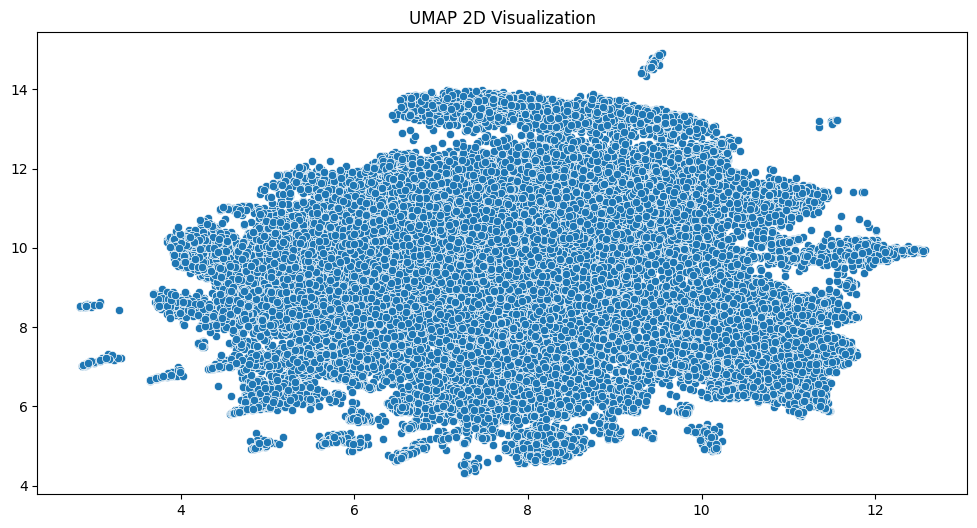

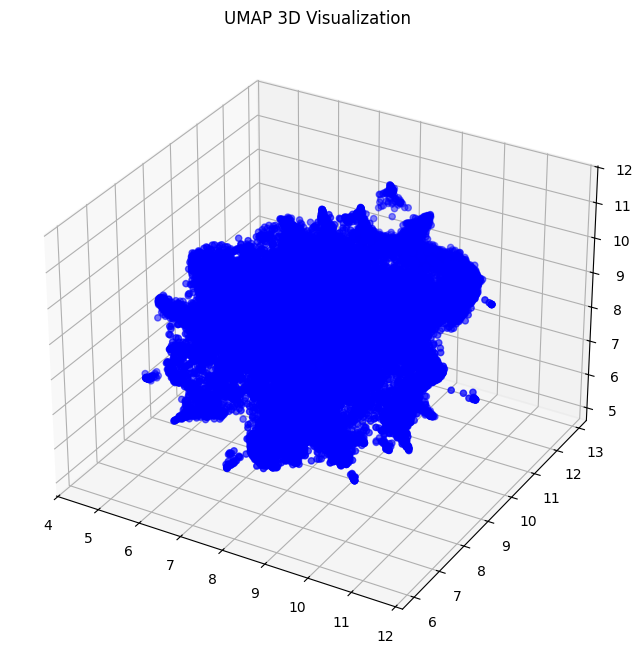

In [13]:
# UMAP with 2 components for visualization
umap_model_2d = umap.UMAP(n_components=2, random_state=42)
umap_features_2d = umap_model_2d.fit_transform(df_metabolites)

# UMAP with 3 components for visualization
umap_model_3d = umap.UMAP(n_components=3, random_state=42)
umap_features_3d = umap_model_3d.fit_transform(df_metabolites)

# 2D Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=umap_features_2d[:, 0], y=umap_features_2d[:, 1], palette='tab10')
plt.title('UMAP 2D Visualization')
plt.show()

# 3D Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_features_3d[:, 0], umap_features_3d[:, 1], umap_features_3d[:, 2], c='blue', marker='o')
ax.set_title('UMAP 3D Visualization')
plt.show()


In [14]:
# UMAP with 10 components for deep learning
umap_model_10d = umap.UMAP(n_components=10, random_state=42)
umap_features_10d = umap_model_10d.fit_transform(df_metabolites)

# Print the shape to ensure it's 10-dimensional
print(f"UMAP Features Shape: {umap_features_10d.shape}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP Features Shape: (35276, 10)


### Applyinf clustiering on the U_map_10d and checking for Quality

In [15]:
# Function to apply KMeans and calculate Silhouette and Davies-Bouldin scores
def apply_kmeans_and_check(umap_features_10d, n_clusters_range):
    results = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_labels = kmeans.fit_predict(umap_features_10d)

        # Calculate Silhouette Score
        silhouette = silhouette_score(umap_features_10d, kmeans_labels)

        # Calculate Davies-Bouldin Score
        davies_bouldin = davies_bouldin_score(umap_features_10d, kmeans_labels)

        results.append({
            'n_clusters': n_clusters,
            'Silhouette Score': silhouette,
            'Davies-Bouldin Score': davies_bouldin
        })

    return pd.DataFrame(results)

# Define a range of clusters for KMeans to test
n_clusters_range = range(2, 11)  # Test from 2 to 10 clusters
kmeans_results = apply_kmeans_and_check(umap_features_10d, n_clusters_range)

# Print the results of varying KMeans clusters
print(kmeans_results)


   n_clusters  Silhouette Score  Davies-Bouldin Score
0           2          0.212926              1.778198
1           3          0.251346              1.400797
2           4          0.280023              1.281311
3           5          0.260123              1.418742
4           6          0.257537              1.483153
5           7          0.269783              1.346108
6           8          0.251895              1.328010
7           9          0.242628              1.384795
8          10          0.247358              1.359343


Given that the Silhouette Score reaches its highest value at K=4 (0.283038) and the Davies-Bouldin Score is lowest at K=4 (1.270515), Thus, K=4 appears to be the optimal choice.

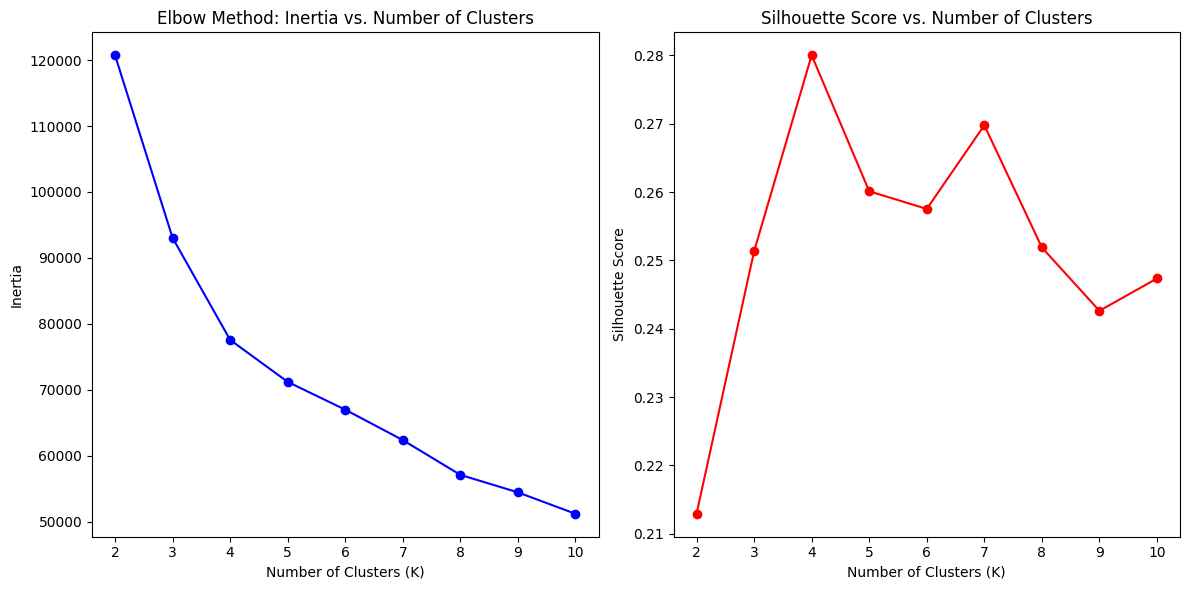

In [16]:
# Define a range of clusters to test
n_clusters_range = range(2, 11)  # Test from 2 to 10 clusters
inertia = []
silhouette_scores = []

# Apply KMeans clustering for different values of K and calculate inertia and silhouette scores
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(umap_features_10d)

    # Inertia for Elbow Method
    inertia.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg = silhouette_score(umap_features_10d, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the Elbow Method
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, inertia, marker='o', color='b')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


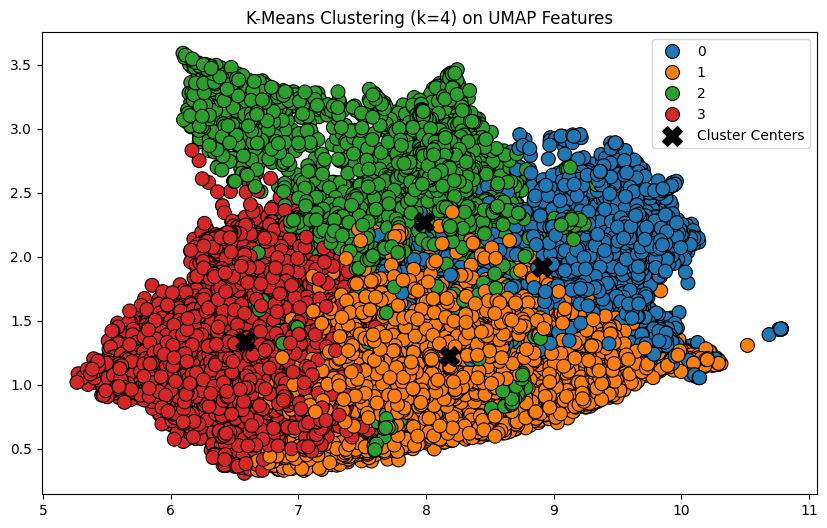

In [17]:
# Fit KMeans with optimal number of clusters
optimal_k = 4  # Example: you can choose the optimal K based on the results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(umap_features_10d)

# Visualize the cluster centers along with the points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=umap_features_10d[:, 0], y=umap_features_10d[:, 1], hue=kmeans_labels, palette='tab10', s=100, edgecolor='k')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Cluster Centers')

plt.title(f'K-Means Clustering (k={optimal_k}) on UMAP Features')
plt.legend()
plt.show()


### Correlation between metabolites and UMAP features to know Top 5 features in each UMAP feature

In [18]:
# Define UMAP features with cluster labels
df_umap_with_labels = pd.DataFrame(umap_features_10d, columns=[f"UMAP{i+1}" for i in range(10)])
df_umap_with_labels['Cluster'] = kmeans_labels  # Adding cluster labels to the DataFrame

# Correlation between metabolites and UMAP features
correlation_matrix = df_metabolites.corrwith(df_umap_with_labels.iloc[:, :-1])  # Exclude 'Cluster' column

# Identify the top metabolites for each UMAP component
top_metabolites_per_umap = {}
for umap_feature in df_umap_with_labels.columns[:-1]:  # Exclude 'Cluster' column
    top_metabolites_per_umap[umap_feature] = df_metabolites.corrwith(df_umap_with_labels[umap_feature]).abs().sort_values(ascending=False).head(5)

# Print top metabolites for each UMAP component
for umap_feature, metabolites in top_metabolites_per_umap.items():
    print(f"Top metabolites for {umap_feature}:")
    print(metabolites)


Top metabolites for UMAP1:
Valine            0.605502
Fatty Acid        0.576749
Acetyl-CoA        0.555101
AMP               0.536622
Deoxyadenosine    0.523823
dtype: float64
Top metabolites for UMAP2:
Cholesterol          0.447754
Oxaloacetate         0.400681
Deoxyadenosine       0.253523
Valine               0.234081
(E,E)-Farnesyl-PP    0.214988
dtype: float64
Top metabolites for UMAP3:
IMP            0.291376
Cholesterol    0.287753
Valine         0.270276
Fatty Acid     0.253978
CDP            0.216943
dtype: float64
Top metabolites for UMAP4:
Acetyl-CoA           0.404804
Fatty Acid           0.275500
Succinyl-CoA         0.246057
Phenylalanine        0.204918
(E,E)-Farnesyl-PP    0.192479
dtype: float64
Top metabolites for UMAP5:
Phenylalanine    0.278722
Fatty Acid       0.240684
Valine           0.229509
Isoleucine       0.222427
Chondroitin      0.215000
dtype: float64
Top metabolites for UMAP6:
GMP                    0.242295
Oxaloacetate           0.231540
Fumarate      

<ipython-input-19-562a194f8f3b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metabolites.values, y=metabolites.index, ax=axes[i], palette='viridis')
<ipython-input-19-562a194f8f3b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metabolites.values, y=metabolites.index, ax=axes[i], palette='viridis')
<ipython-input-19-562a194f8f3b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metabolites.values, y=metabolites.index, ax=axes[i], palette='viridis')
<ipython-input-19-562a194f8f3b>:6: FutureWarning: 

Passing `palette` without assi

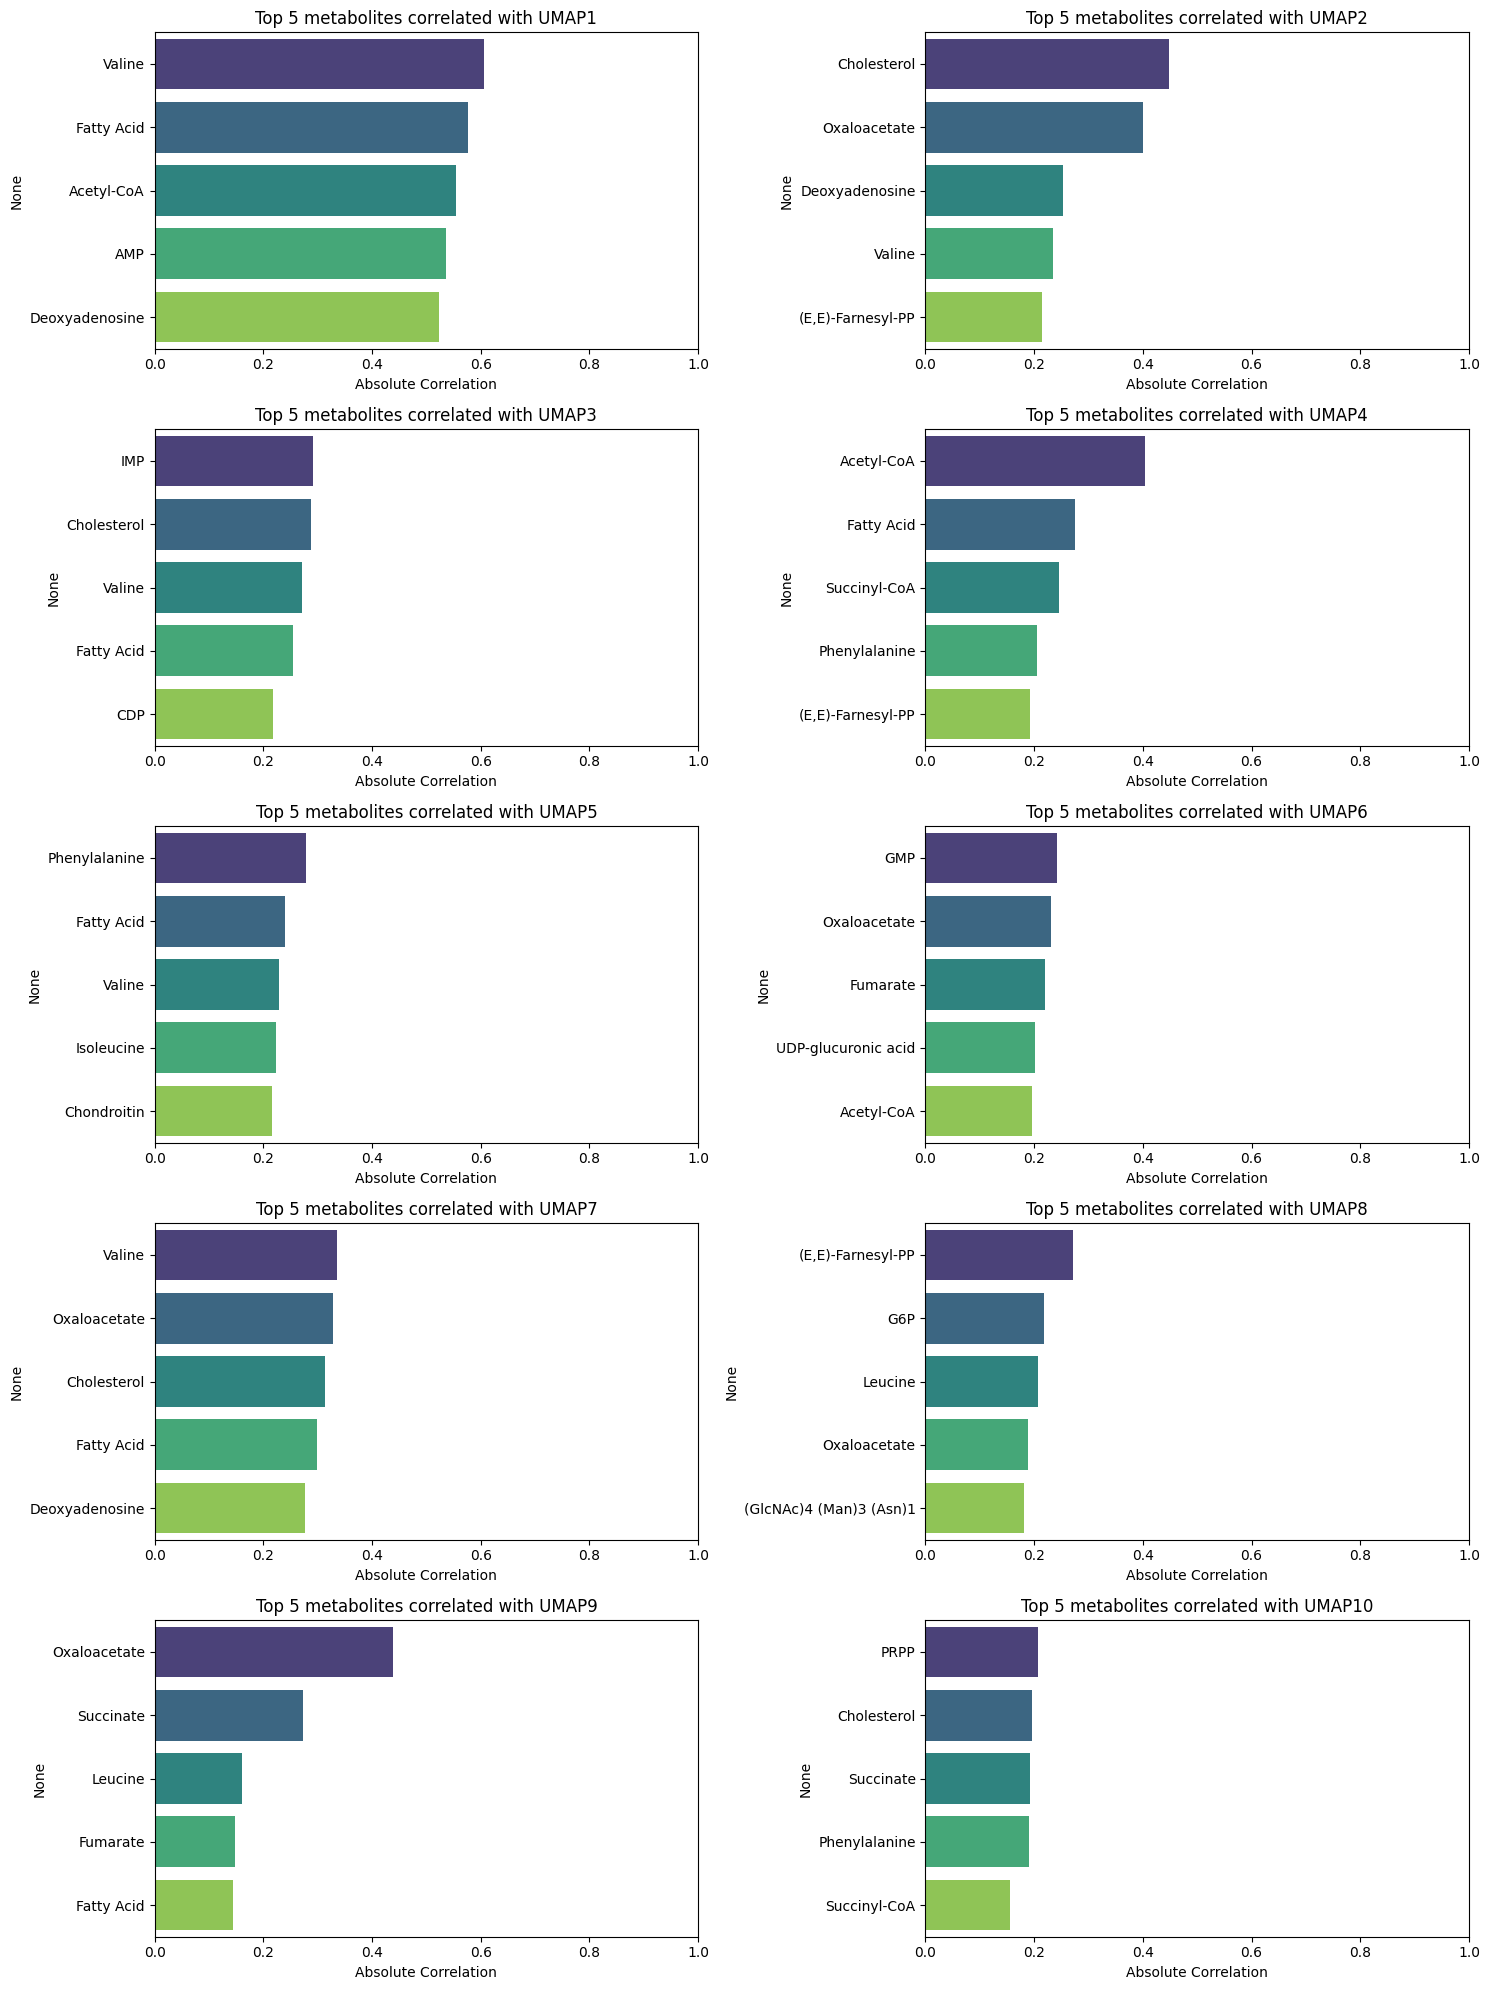

In [19]:
# Plot top 5 metabolites for each UMAP component
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, (umap_feature, metabolites) in enumerate(top_metabolites_per_umap.items()):
    sns.barplot(x=metabolites.values, y=metabolites.index, ax=axes[i], palette='viridis')
    axes[i].set_title(f"Top 5 metabolites correlated with {umap_feature}")
    axes[i].set_xlabel("Absolute Correlation")
    axes[i].set_xlim(0, 1)

plt.tight_layout()
plt.show()

### Statistical Tests (ANOVA/Kruskal-Wallis) (Best for identifying differences between clusters)
ANOVA to Identify Significant Metabolites Across Clusters
This step will help identify metabolites that show significant variation across clusters. You'll calculate the p-values and select metabolites with the smallest p-values.

In [20]:
from scipy.stats import f_oneway

# Store ANOVA results for each metabolite
anova_results = {}

for metabolite in df_metabolites.columns:
    groups = [df_metabolites[metabolite][df_umap_with_labels['Cluster'] == cluster_id] for cluster_id in range(optimal_k)]
    f_stat, p_value = f_oneway(*groups)
    anova_results[metabolite] = p_value

# Sort metabolites by p-value and select the top ones
top_anova_metabolites = sorted(anova_results.items(), key=lambda x: x[1])[:10]
print("Top 10 metabolites based on ANOVA p-value:")
for metabolite, p_value in top_anova_metabolites:
    print(f"{metabolite}: {p_value}")


Top 10 metabolites based on ANOVA p-value:
AMP: 0.0
Acetyl-CoA: 0.0
2OG: 0.0
Oxaloacetate: 0.0
Succinate: 0.0
lysine: 0.0
Glutathione: 0.0
Methionine: 0.0
Phenylalanine: 0.0
Succinyl-CoA: 0.0


<ipython-input-21-624fdb0ce29b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=met, data=df_plot, palette="Set2")
<ipython-input-21-624fdb0ce29b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=met, data=df_plot, palette="Set2")
<ipython-input-21-624fdb0ce29b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=met, data=df_plot, palette="Set2")
<ipython-input-21-624fdb0ce29b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

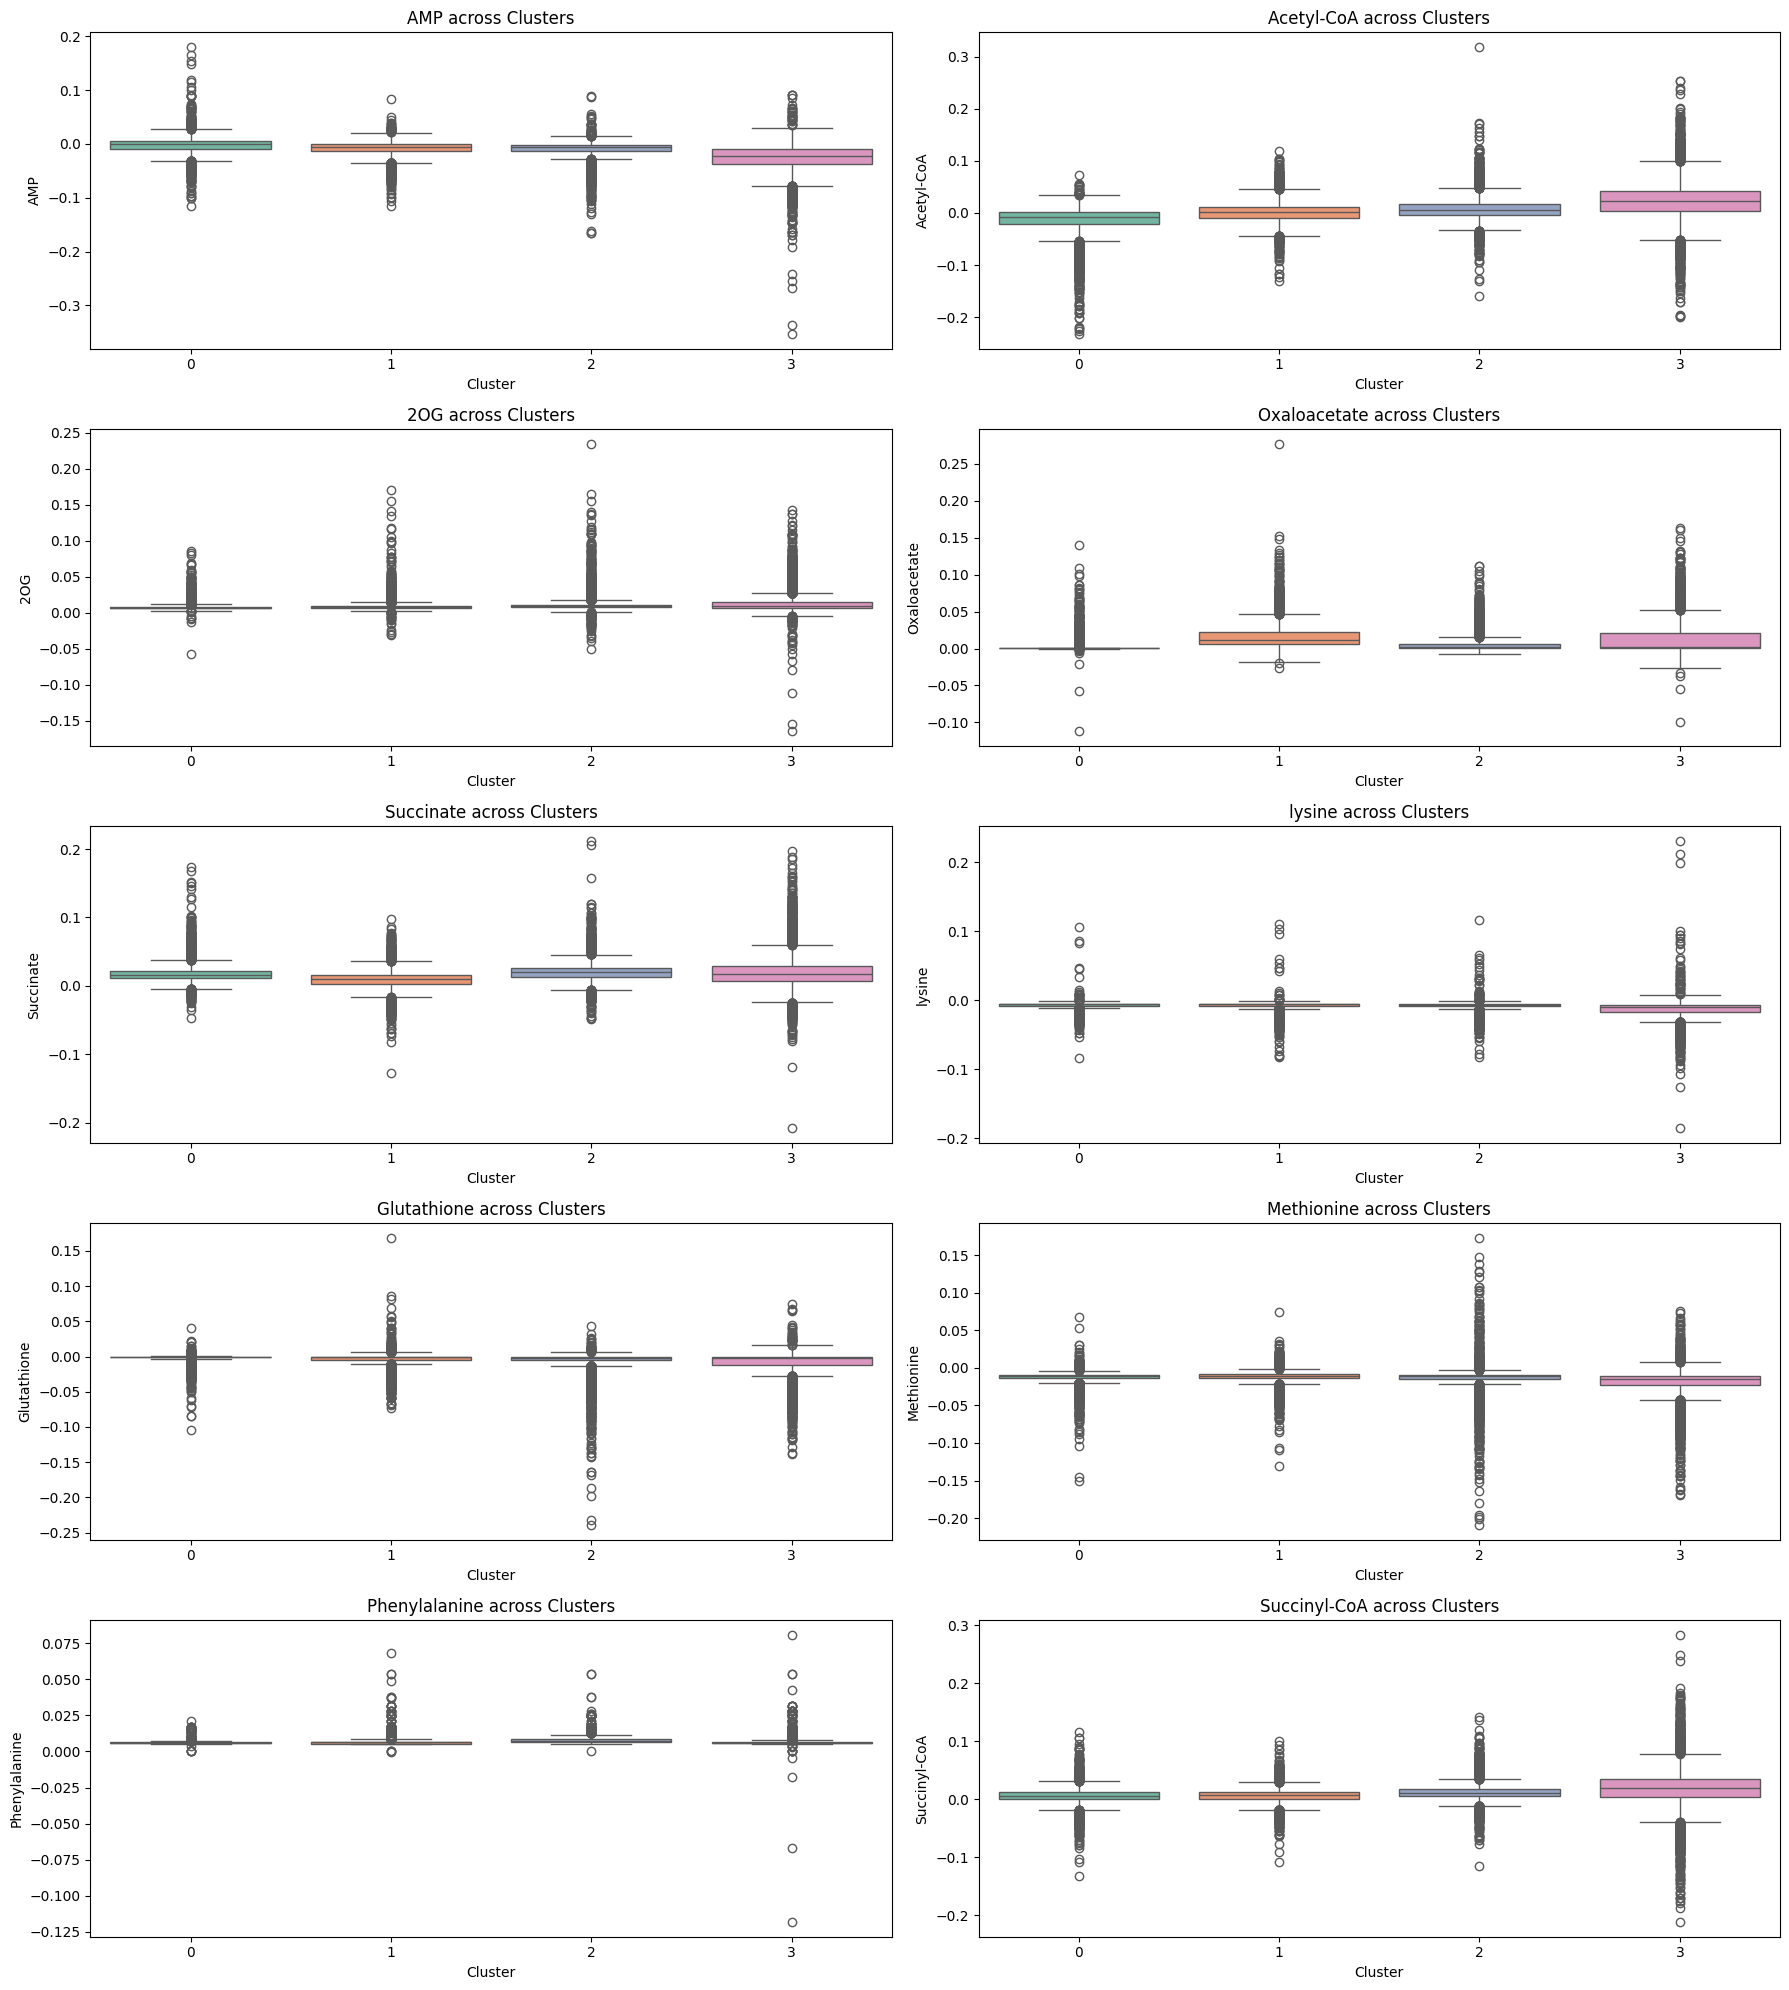

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with Cluster info included
df_plot = df_metabolites.copy()
df_plot["Cluster"] = df_umap_with_labels["Cluster"]

# Plot top 10 metabolites with lowest p-values
top_met_names = [met for met, _ in top_anova_metabolites]

plt.figure(figsize=(18, 20))
for i, met in enumerate(top_met_names):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x="Cluster", y=met, data=df_plot, palette="Set2")
    plt.title(f"{met} across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(met)

plt.tight_layout()
plt.show()


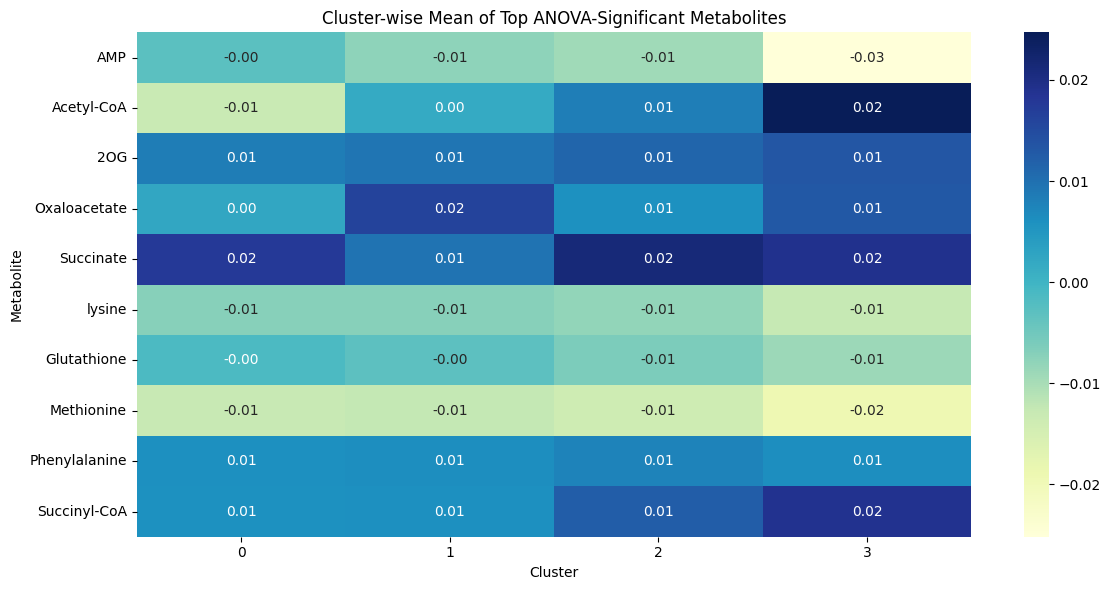

In [22]:
# Compute cluster-wise means for top ANOVA metabolites
cluster_means = df_plot.groupby("Cluster")[top_met_names].mean()

# Plot as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Cluster-wise Mean of Top ANOVA-Significant Metabolites")
plt.xlabel("Cluster")
plt.ylabel("Metabolite")
plt.tight_layout()
plt.show()


the above  ANOVA test to find the top metabolites, and  found that the p-values for all the metabolites are 0.0. This suggests that all of these metabolites are statistically significant in differentiating the clusters, which means they have very strong associations with the clusters.

Key Takeaways:
ANOVA p-value of 0.0 typically indicates a highly significant difference between groups for each of the metabolites. It suggests that the metabolites listed above (AMP, Acetyl-CoA, 2OG, etc.) are strongly contributing to the differentiation of the clusters.

These metabolites are good candidates for biomarkers or therapeutic targets in this  analysis, as they appear to have a clear role in separating the different clusters or subtypes of TNBC.



### FOR ENRICHMENT PATHWAY ANALYSIS
 Mean Metabolite Concentration per Cluster (Central Tendency)
One common approach is to calculate the mean metabolite concentration within each cluster and identify the top 10 metabolites that have the highest mean values for each cluster. This gives a sense of which metabolites are most abundant in each cluster.

### Using Mean to identify the top 10 metabolites for each cluster for Enrichment Pathway Analysis

In [23]:
# Assuming 'df_metabolites' contains metabolite data and 'df_umap_with_labels' contains cluster labels
df_metabolites['Cluster'] = df_umap_with_labels['Cluster']  # Add the cluster labels to the metabolite dataframe

# Calculate mean metabolite concentration per cluster
cluster_means = df_metabolites.groupby('Cluster').mean()

# Identify the top 10 metabolites for each cluster
top_10_metabolites = {}
for cluster_id in cluster_means.index:
    top_10_metabolites[cluster_id] = cluster_means.loc[cluster_id].nlargest(10).index.tolist()

# Print top 10 metabolites for each cluster
for cluster_id, metabolites in top_10_metabolites.items():
    print(f"Top 10 metabolites for Cluster {cluster_id}: {metabolites}")


Top 10 metabolites for Cluster 0: ['Succinate', 'Fumarate', 'Histidine', 'B-Alanine', 'Fatty Acid', 'Pyrimidine', 'Spermine', '(E,E)-Farnesyl-PP', 'Proline', 'Chondroitin']
Top 10 metabolites for Cluster 1: ['Oxaloacetate', 'B-Alanine', 'Malate', 'Cholesterol', 'Histidine', 'Pyrimidine', 'Spermine', 'Succinate', '2OG', 'Chondroitin']
Top 10 metabolites for Cluster 2: ['Succinate', 'B-Alanine', 'Fumarate', 'Succinyl-CoA', 'Histidine', 'Pyrimidine', 'Proline', '2OG', 'Spermine', 'Chondroitin']
Top 10 metabolites for Cluster 3: ['Acetyl-CoA', 'Succinate', 'Succinyl-CoA', 'Fumarate', 'B-Alanine', 'Cholesterol', '2OG', 'Oxaloacetate', 'Deoxyadenosine', 'Proline']


<ipython-input-23-3eb66e5c2986>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metabolites['Cluster'] = df_umap_with_labels['Cluster']  # Add the cluster labels to the metabolite dataframe


Top 10 metabolites for Cluster 0: ['Succinate', 'Fumarate', 'Histidine', 'B-Alanine', 'Fatty Acid', 'Pyrimidine', 'Spermine', '(E,E)-Farnesyl-PP', 'Proline', 'Chondroitin']
Top 10 metabolites for Cluster 1: ['Acetyl-CoA', 'Succinate', 'Succinyl-CoA', 'Fumarate', 'B-Alanine', 'Cholesterol', '2OG', 'Deoxyadenosine', 'Oxaloacetate', 'Proline']
Top 10 metabolites for Cluster 2: ['Succinate', 'B-Alanine', 'Fumarate', 'Succinyl-CoA', 'Histidine', 'Pyrimidine', 'Proline', '2OG', 'Spermine', 'Chondroitin']
Top 10 metabolites for Cluster 3: ['Oxaloacetate', 'B-Alanine', 'Malate', 'Cholesterol', 'Histidine', 'Pyrimidine', 'Spermine', 'Succinate', '2OG', 'Chondroitin']

### mapping clustering to TNBC Subtypes and merging it to the original Dataframe of 70 columns

In [24]:
# mapping clustering to TNBC Subtypes and merging it to the original Dataframe of 70 columns
df_metabolites['Cluster'] = kmeans_labels  # Assuming 'kmeans_labels' are the cluster assignments

# Now you can proceed with the mapping to TNBC subtypes
cluster_to_tnbc_subtype = {
    0: 'Basal-like 1 (BL1)',
    1: 'Mesenchymal (M)',
    2: 'Basal-like 2 (BL2)',
    3: 'Luminal Androgen Receptor (LAR)'
}

# Add a new column with the corresponding TNBC subtypes
df_metabolites['TNBC_Subtype'] = df_metabolites['Cluster'].map(cluster_to_tnbc_subtype)

# Drop the 'Cluster' column as it's now replaced by 'TNBC_Subtype'
df_metabolites = df_metabolites.drop(columns=['Cluster'])

# Display the updated dataframe
print(df_metabolites.head())


        AMP  Pyruvate  Acetyl-CoA  Glutamate       2OG  Oxaloacetate  \
0 -0.010239  0.000631   -0.000042  -0.005516  0.008809      0.013755   
1 -0.012007  0.003525   -0.024046   0.002816  0.047261      0.007665   
2 -0.003727  0.012940    0.002271   0.001271  0.009750      0.004987   
3 -0.008337  0.003148    0.003621  -0.002131  0.012203      0.016008   
4 -0.008580 -0.022309   -0.005764   0.011526  0.013700      0.006834   

    Glycine  Succinate  UDP-N-acetylglucosamine    lysine  ...  \
0 -0.012962   0.009903                -0.001301 -0.007394  ...   
1 -0.024386   0.037714                -0.003977 -0.027739  ...   
2 -0.013087   0.029924                -0.001715 -0.011989  ...   
3 -0.013417   0.025335                -0.001269 -0.005873  ...   
4 -0.013482   0.054048                -0.001238 -0.008955  ...   

   Argininosuccinate  Dolichyl phosphate D-mannose     AICAR  Fatty Acid  \
0          -0.004012                     -0.007580 -0.002153    0.004983   
1          -0.0073

<ipython-input-24-698b92b19746>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metabolites['Cluster'] = kmeans_labels  # Assuming 'kmeans_labels' are the cluster assignments
<ipython-input-24-698b92b19746>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metabolites['TNBC_Subtype'] = df_metabolites['Cluster'].map(cluster_to_tnbc_subtype)


### ======= Plot the class balance distribution as a pie chart=======

TNBC_Subtype
Luminal Androgen Receptor (LAR)    0.313301
Mesenchymal (M)                    0.274776
Basal-like 2 (BL2)                 0.212893
Basal-like 1 (BL1)                 0.199031
Name: proportion, dtype: float64


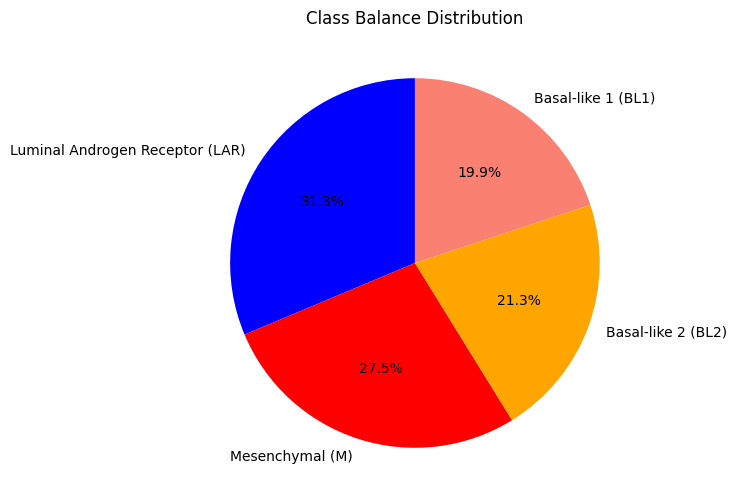

In [25]:
# Assuming df is your dataset and 'TNBC_Subtype' is the target column
class_balance = df_metabolites['TNBC_Subtype'].value_counts(normalize=True)
print(class_balance)

plt.figure(figsize=(6, 6))
plt.pie(class_balance, labels=class_balance.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red', 'orange', 'salmon'])
plt.title('Class Balance Distribution')
plt.show()

### Download the Data for Training

In [26]:
from google.colab import files

# Save df_umap_with_labels to CSV
df_umap_with_labels.to_csv('umap_df_10d_--.csv', index=False)

# Download the UMAP CSV
files.download('umap_df_10d_--.csv')

# Save df_metabolites to CSV
df_metabolites.to_csv('df_metabolites_.csv', index=False)

# Download the metabolites CSV
files.download('df_metabolites_.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
df_umap_with_labels = pd.DataFrame(umap_features_10d, columns=[f"UMAP{i+1}" for i in range(10)])
df_umap_with_labels['Cluster'] = kmeans_labels
# Save the UMAP 10D feature DataFrame with clusters
df_umap_with_labels.to_csv('umap_df_10d__.csv', index=False)
